In [4]:
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np
import os, sys

In [16]:
cd ASTR_136

/home/jovyan/ASTR_136


In [17]:
files = os.listdir('BIAS/Stuff')
biasdata = np.zeros((510, 765, len(files)))

In [18]:
cd BIAS/Stuff

/home/jovyan/ASTR_136/BIAS/Stuff


In [19]:
for i in range(len(files)):
    hdu = fits.open(files[i])
    biasdata[:,:, i] = hdu[0].data

In [20]:
bias_master_mean = np.mean(biasdata, axis =2)
bias_master_median = np.median(biasdata, axis =2)

In [21]:
cd ../..

/home/jovyan/ASTR_136


In [22]:
files_dark = os.listdir('DARK/')
dark_data = np.zeros((510, 765, len(files_dark)))

In [23]:
cd DARK

/home/jovyan/ASTR_136/DARK


In [24]:
exp_times =[]
for i in range(len(files_dark)):
    hdu_dark = fits.open(files_dark[i])
    dark_data[:,:, i] = hdu_dark[0].data #retrieving data from each individual fits file
    exp_time = hdu_dark[0].header['EXPTIME']
    exp_times.append(exp_time) 

In [25]:
exp_times = np.array(exp_times)

In [26]:
bias_master = bias_master_mean[:,:,None]
z = np.arange(1,41,1)
for i in z:
    dark_reduced = dark_data - bias_master #dark_master = individ dark fits subtracted by bias

In [27]:
dark_master = dark_reduced/exp_time

In [28]:
cd ..

/home/jovyan/ASTR_136


In [29]:
files_flat = [f for f in os.listdir('TWI/') if f.endswith('.fits')]
flat_data = np.zeros((510, 765, len(files_flat)))

In [30]:
cd TWI

/home/jovyan/ASTR_136/TWI


In [31]:
exp_time_flat = []
times = []
for i in range(len(files_flat)):
    hdu_flat = fits.open(files_flat[i])
    flat_data[:,:, i] = hdu_flat[0].data #retrieving data from each individual fits file
    exp_times_flat = hdu_flat[0].header['EXPTIME']
    time= hdu_flat[0].header['TIME-OBS'].split(':')
    times.append(time)
    exp_time_flat.append(exp_times_flat)
    exp_flat = np.array(exp_time_flat)

In [32]:
flat_data.shape

(510, 765, 4)

In [33]:
dark_mean = np.mean(dark_master, axis=2, keepdims=True)

In [34]:
flat_master = ((flat_data - bias_master)/exp_flat)-dark_mean #here it's still all 67 images

In [35]:
flat_master = np.mean(flat_master, axis =2 , keepdims = True)

In [36]:
flat_master.shape

(510, 765, 1)

In [37]:
cd ..

/home/jovyan/ASTR_136


In [38]:
files_science = [f for f in os.listdir('SCIENCE') if f.endswith('.fits')]
science_data = np.zeros((510, 765, len(files_science)))

In [39]:
cd SCIENCE

/home/jovyan/ASTR_136/SCIENCE


In [127]:
files_science[66]

'Project1_SB.00000122.fits'

In [41]:
exp_time_science = []
times = []
for i in range(len(files_science)):
    hdu_science = fits.open(files_science[i])
    science_data[:,:, i] = hdu_science[0].data #retrieving data from each individual fits file
    exp_times_science = hdu_science[0].header['EXPTIME']
    time= hdu_science[0].header['TIME-OBS'].split(':')
    times.append(time)
    exp_time_science.append(exp_times_science)
    exp_science = np.array(exp_time_science)

In [123]:
science_data[0]

array([[ 5606.,  4484.,  7175., ..., 17629., 16643.,  9858.],
       [ 5694.,  4486.,  7193., ..., 17500., 16470.,  9840.],
       [ 5577.,  4429.,  7115., ..., 17644., 16690.,  9939.],
       ...,
       [ 5755.,  4384.,  7048., ..., 17633., 16633.,  9858.],
       [ 5584.,  4471.,  7108., ..., 17592., 16745.,  9857.],
       [ 5718.,  4436.,  7094., ..., 17789., 16947.,  9959.]])

In [43]:
science_master =((science_data - bias_master)/exp_science)-dark_mean 

In [44]:
science_image = science_master / flat_master

In [45]:
science_mean = science_image.mean(axis = (0,1))

In [46]:
science_mean

array([1.89153573e-02, 1.47336902e-02, 7.87749462e-03, 4.02938977e-03,
       6.73406187e-02, 6.14303253e-02, 5.60047471e-02, 5.11234056e-02,
       2.86469880e-02, 3.68445314e-02, 1.33041458e-01, 1.15543956e-01,
       1.05762988e-01, 9.66742855e-02, 8.83330627e-02, 8.07443902e-02,
       1.79746616e-01, 7.36678583e-02, 1.92422561e+00, 9.46642785e-01,
       8.94109015e-01, 4.40652722e-01, 1.71013058e-01, 1.62712254e-01,
       1.54636196e-01, 3.89976005e+00, 2.24637414e-02, 1.39877338e-01,
       1.73561413e+00, 1.47144436e-01, 3.58315058e-01, 1.01771280e+00,
       3.47675412e-01, 3.77686036e+00, 3.92412360e-01, 3.37039582e-01,
       2.07695590e-01, 1.98394858e-01, 1.03525316e+00, 1.78735465e+00,
       1.88911170e-01, 4.16586511e-01, 3.99960841e+00, 1.89686455e+00,
       3.63925477e+00, 9.58461313e-01, 4.28975790e-01, 1.94543603e+00,
       4.24810841e+00, 1.86982464e+00, 9.97226620e-01, 3.89749176e+00,
       3.69196444e-01, 3.80527457e-01, 4.06683334e+00, 9.09191098e-01,
      

In [47]:
times = np.array(times)

In [122]:
times

array([['03', '17', '45.420'],
       ['03', '18', '47.976'],
       ['03', '20', '39.579'],
       ['03', '23', '42.084'],
       ['03', '12', '30.170'],
       ['03', '12', '52.650'],
       ['03', '13', '15.286'],
       ['03', '13', '37.765'],
       ['03', '15', '40.417'],
       ['03', '14', '37.970'],
       ['03', '09', '45.590'],
       ['03', '10', '15.152'],
       ['03', '10', '37.694'],
       ['03', '11', '00.174'],
       ['03', '11', '22.685'],
       ['03', '11', '45.180'],
       ['03', '08', '30.585'],
       ['03', '12', '07.722'],
       ['02', '58', '26.212'],
       ['03', '01', '46.402'],
       ['03', '01', '57.354'],
       ['03', '04', '48.759'],
       ['03', '08', '43.065'],
       ['03', '08', '55.561'],
       ['03', '09', '08.088'],
       ['02', '55', '19.716'],
       ['03', '16', '42.942'],
       ['03', '09', '33.141'],
       ['02', '58', '55.727'],
       ['03', '09', '20.614'],
       ['03', '05', '41.222'],
       ['03', '01', '18.993'],
       [

In [105]:
hours = np.array(times[:,0])
minutes = np.array(times[:,1])
seconds = np.array(times[:,2])

In [106]:
print(len(seconds))

67


In [107]:
z = np.arange(0,67,1)

In [108]:
hours_sec = []
min_sec = []
SECOND = []

for i in range(len(z)):
    hours_secs =  int(hours[i]) 
    min_secs = int(minutes[i])
    second = float(seconds[i])
    hours_sec.append(hours_secs)
    min_sec.append(min_secs)
    SECOND.append(second)

    #hours_to_sec = hours_sec*360
    #min_sec= min_sec*60
    

In [109]:
hours_sec = np.array(hours_sec)
min_sec = np.array(min_sec)

In [111]:
HOURS_SEC = hours_sec*360
MIN_SEC = min_sec*60
print(len(SECOND))

67


In [112]:
SECOND

[45.42,
 47.976,
 39.579,
 42.084,
 30.17,
 52.65,
 15.286,
 37.765,
 40.417,
 37.97,
 45.59,
 15.152,
 37.694,
 0.174,
 22.685,
 45.18,
 30.585,
 7.722,
 26.212,
 46.402,
 57.354,
 48.759,
 43.065,
 55.561,
 8.088,
 19.716,
 42.942,
 33.141,
 55.727,
 20.614,
 41.222,
 18.993,
 48.71,
 26.143,
 18.773,
 56.276,
 53.083,
 5.578,
 13.533,
 47.272,
 18.043,
 3.844,
 29.372,
 30.424,
 38.982,
 40.911,
 56.309,
 22.031,
 32.617,
 34.667,
 24.453,
 22.929,
 33.765,
 26.261,
 35.799,
 51.894,
 51.515,
 38.879,
 42.18,
 16.455,
 13.195,
 29.991,
 35.451,
 2.814,
 43.076,
 59.924,
 11.332]

In [113]:
SEC = np.array(SECOND)

In [114]:
print(len(SEC))

67


In [115]:
TIME = HOURS_SEC + MIN_SEC +SEC

In [117]:
print(TIME)

[2145.42  2207.976 2319.579 2502.084 1830.17  1852.65  1875.286 1897.765
 2020.417 1957.97  1665.59  1695.152 1717.694 1740.174 1762.685 1785.18
 1590.585 1807.722 4226.212 1186.402 1197.354 1368.759 1603.065 1615.561
 1628.088 4039.716 2082.942 1653.141 4255.727 1640.614 1421.222 1158.993
 1428.71  4046.143 1398.773 1436.276 1553.083 1565.578 1153.533 4247.272
 1578.043 1383.844 4049.372 4230.424 4058.982 1180.911 1376.309 4222.031
 4052.617 4234.667 1164.453 4042.929 1413.765 1406.261 4055.799 1191.894
 4251.515 4238.879 4062.18  4036.455 4033.195 1169.991 1175.451 1202.814
 4243.076 4259.924 1391.332]


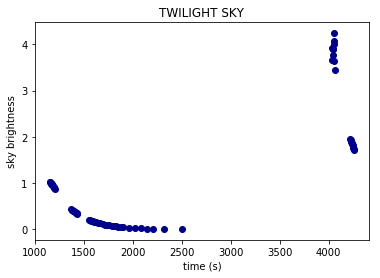

In [120]:
plt.xlabel('time (s)') 
plt.ylabel('sky brightness') 
plt.title('TWILIGHT SKY')
ax = plt.subplot(111)
plt.scatter(TIME, science_mean, label="projected" , color = 'darkblue')
plt.show() 

In [ ]:
#make flat_master by following same protocol but using TWI SKI
# make final flat image by subtracting flat_master - dark_master

In [ ]:
#do a best fit line and return goodness of fit
#times vs. sky brightess (time = min)
#